In [376]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from scipy.sparse import csr_matrix

Pedro Henrique Rodrigues Mendes

tel (61) 9 9161-4136

E-mail Pedrojjp2@gmail.com

# Load dos Dados

In [126]:
df = pd.read_csv('base_desafio.csv', sep='|')

In [127]:
df.head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,seller_state,seller_city,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,SP,volta redonda,2017-09-13 08:59:02
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,SP,volta redonda,2017-06-28 11:52:20
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,SP,volta redonda,2018-05-18 10:25:53
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,SP,volta redonda,2017-08-01 18:38:42
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,SP,volta redonda,2017-08-10 21:48:40
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,26.93,cool_stuff,SP,volta redonda,2017-07-27 15:11:51
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,38.50,cool_stuff,SP,volta redonda,2018-03-18 21:00:44
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,18.12,cool_stuff,SP,volta redonda,2017-08-05 16:59:05
8,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,58.9,17.83,cool_stuff,SP,volta redonda,2017-08-05 16:59:05
9,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,35.71,cool_stuff,SP,volta redonda,2017-06-05 12:22:19


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98309 entries, 0 to 98308
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98309 non-null  object 
 1   order_item_id             98309 non-null  int64  
 2   product_id                98309 non-null  object 
 3   seller_id                 98309 non-null  object 
 4   price                     98309 non-null  float64
 5   freight_value             98309 non-null  float64
 6   product_category_name     96785 non-null  object 
 7   seller_state              98309 non-null  object 
 8   seller_city               98309 non-null  object 
 9   order_purchase_timestamp  98309 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.5+ MB


# Volumes de vendas

In [129]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].astype('datetime64')

vol_sales_years = df.groupby(df['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values())['order_purchase_timestamp'].count()
vol_sales_years = vol_sales_years.sort_index()

In [130]:
vol_sales_years = df.groupby(df['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values())['order_purchase_timestamp'].count().sort_index()

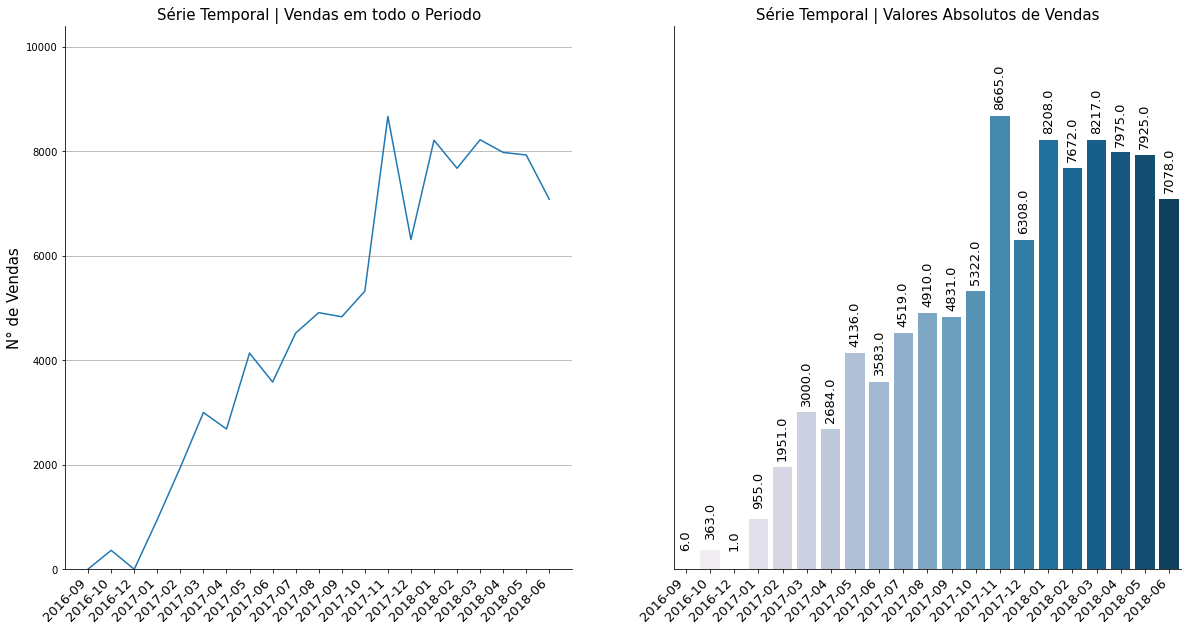

In [369]:
fig, axs = plt.subplots(figsize = (20,10),ncols=2)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plot = sns.lineplot(y=vol_sales_years, x=vol_sales_years.index,ax=axs[0])
plot.set_xticklabels(vol_sales_years.index, rotation=45,horizontalalignment='right', size = 13);
plot.set_title('Série Temporal | Vendas em todo o Periodo', size = 15)
plot.set_ylabel('N° de Vendas', size = 15);
plot.set(ylim=(0, max(vol_sales_years)*1.2))
plot.set_xlabel('');
plot.grid(True, axis='y')
plot.patch.set_linewidth('0')

plot_bar = sns.barplot(x=vol_sales_years.index, y=vol_sales_years,ax=axs[1],palette="PuBu")
plot_bar.set_title('Série Temporal | Valores Absolutos de Vendas', size = 15)
plot_bar.set(ylim=(0, max(vol_sales_years)*1.2))
plot_bar.set_xticklabels(vol_sales_years.index, rotation=45,horizontalalignment='right', size = 13);
plot_bar.set_ylabel('');
plot_bar.set_xlabel('');
for p in plot_bar.patches:
    plot_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 29), 
                   textcoords = 'offset points',
                   rotation=90, size = 13)
plot_bar.set(yticklabels=[])
plot_bar.tick_params(left=False)

Ao realizar uma analise da série temporal das vendas do dataset, observamos um crescimento exponencial no 2017 de vendas, principalmente no mês de Novembro desse ano (Provavelmente Black Friday).

Em 2028 há uma ligeiro crescimento, porém, a tendencia inverte para uma possível redução de vendas, em numeros absolutos de Março à Junho de 2018 no gráfico direito vemos uma queda de 13% nas vendas totais.

É um fator preocupante essa queda, é muito importante avaliar as causas pois essa empresa vende uma ampla gama de produtos e isso pode ocorrer em problemas de estocagem ou produtos em encalhados.

# Principais produtos, localizações e sellers

In [132]:
top_product = (df.groupby(df['product_id'])['price'].sum('price').sort_values(ascending=False) / sum(df['price']))*100
top_city = (df.groupby(df['seller_city'])['price'].sum('price').sort_values(ascending=False)  / sum(df['price']))*100
top_seller = (df.groupby(df['seller_id'])['price'].sum('price').sort_values(ascending=False) /sum(df['price']))*100

In [133]:
top_seller = pd.concat([top_seller.head(10), pd.Series([round(sum(top_seller[10:]),2)], index=['Outros'])])
top_city = pd.concat([top_city.head(10), pd.Series([round(sum(top_city[10:]),2)], index=['Outros'])])
top_product = pd.concat([top_product.head(10), pd.Series([round(sum(top_product[10:]),2)], index=['Outros'])])

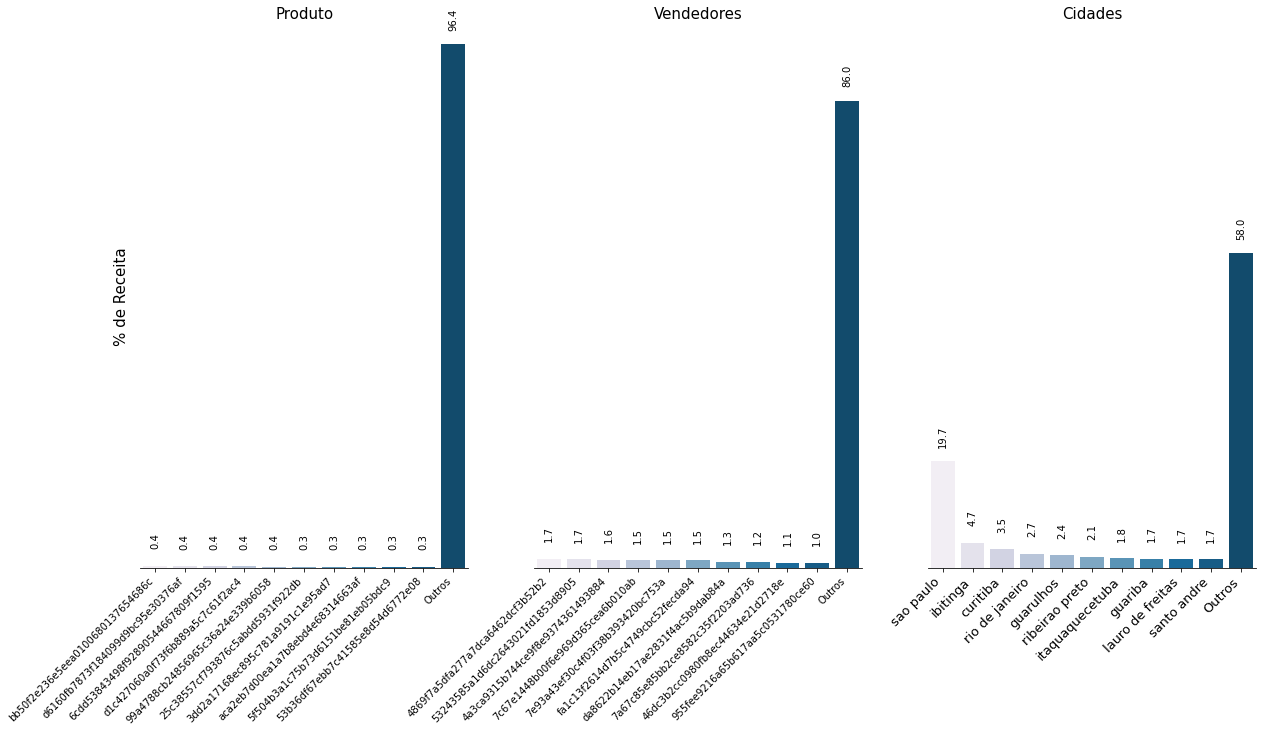

In [345]:
fig, axs = plt.subplots(figsize = (20,10),ncols=3)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plot_2016 = sns.barplot(x=top_product.index, y=top_product, ax=axs[0],palette="PuBu")
plot_2016.set_title('Produto', size = 15)
plot_2016.set(ylim=(0, 100))
plot_2016.set_xticklabels(top_product.index, rotation=45,horizontalalignment='right');
plot_2016.set_ylabel('% de Receita', size = 15);
plot_2016.set_xlabel('');
for p in plot_2016.patches:
    plot_2016.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points',
                   rotation=90)
plot_2016.set(yticklabels=[])
plot_2016.tick_params(left=False)

plot_2017 = sns.barplot(x=top_seller.index, y=top_seller, ax=axs[1],palette="PuBu")
plot_2017.set_title('Vendedores', size = 15)
plot_2017.set_xticklabels(top_seller.index, rotation=45,horizontalalignment='right');
plot_2017.set_ylabel('');
plot_2017.set_xlabel('');
for p in plot_2017.patches:
    plot_2017.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points',
                   rotation=90)
plot_2017.set(ylim=(0, 100))
plot_2017.set(yticklabels=[])
plot_2017.tick_params(left=False)

plot_2018 = sns.barplot(x=top_city.index,y=top_city, ax=axs[2],palette="PuBu")
plot_2018.set_title('Cidades', size = 15)
plot_2018.set(ylim=(0, 100))
plot_2018.set_xticklabels(top_city.index, rotation=45,horizontalalignment='right', size = 13);
plot_2018.set_ylabel('');
plot_2018.set_xlabel('');
for p in plot_2018.patches:
    plot_2018.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points',
                   rotation=90)
plot_2018.set(yticklabels=[])
plot_2018.tick_params(left=False)


Vemos com esses gráficos de barras:

- As vendas de produto da empresa é bastante pulverizada, tanto que os 10 produtos mais vendidos contribuem com menos de 4% nas vendas totais.

- Quase a mesma coisa ocorre com vendedores, os 10 melhores vendedores contribuem com aprox. 14% das vendas totais.

- As vendas por cidade ocorrem bastante no Sudoeste do Brasil, só a Grande São Paulo por si só abrange quase 20% das vendas totais.



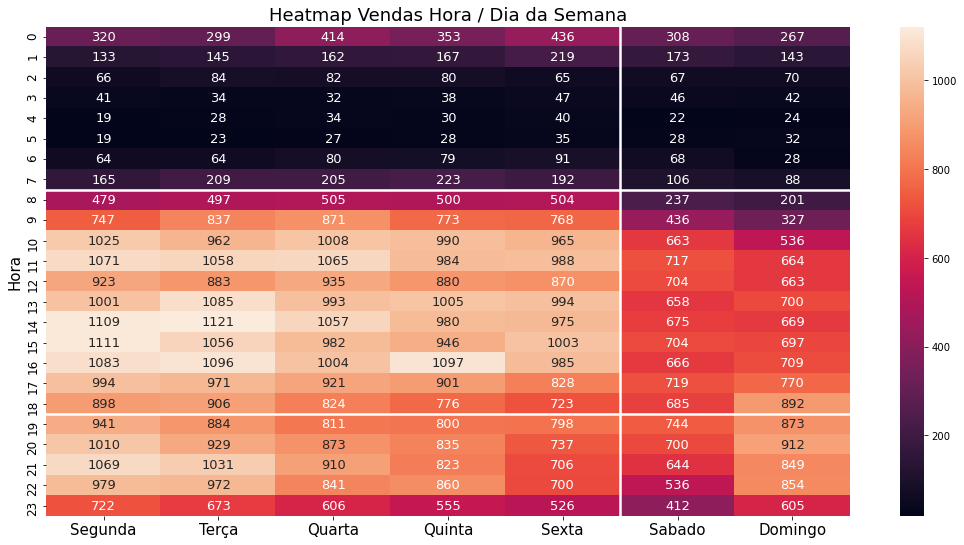

In [338]:
teste = df.groupby([df.order_purchase_timestamp.dt.hour , df.order_purchase_timestamp.dt.weekday])['order_purchase_timestamp'].count().unstack(fill_value=0)

fig, axs = plt.subplots(figsize = (18,9))
heat_semanal = sns.heatmap(teste, annot=True, fmt="d", annot_kws={"size":13})
heat_semanal.set_ylabel("Hora", size = 15)
heat_semanal.set_xlabel("");
heat_semanal.set_title('Heatmap Vendas Hora / Dia da Semana', size = 18)
heat_semanal.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'], size = 15);
heat_semanal.set_yticklabels(teste.index, size = 12);
heat_semanal.axhline(y=8, xmin=0, xmax=5, color='white',linewidth = 2.5);
heat_semanal.axhline(19,color='white',linewidth = 2.5);
heat_semanal.axvline(5,color='white',linewidth = 2.5);

Esse Heatmap nós trás informações interessantes sobre comportamento de vendas da empresa.

- Vemos uma concentração de vendas nos horários comerciais e de noite, principalmente entre as 13 às 22 horas.

- Um período em especial é segunda-feira das 13 às 16, o periodo que mais vende durante a semana.

- Outro período especial é domingo das 18 às 22, ocorre uma concentração atipica de vendas nesse horário.

- Caso seja uma empresa de e-commerce, é recomendando realizar mudanças na infra de TI durante as 2 ás 5 horas da manhã, pois é o preíodo com menor atividade de vendas.

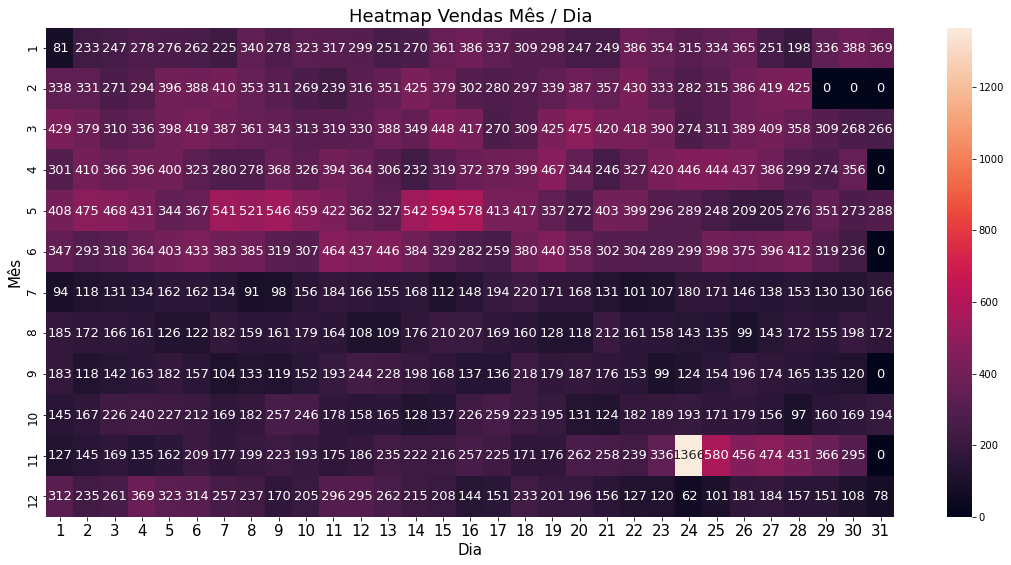

In [340]:
teste2 = df.groupby([df.order_purchase_timestamp.dt.month , df.order_purchase_timestamp.dt.day])['order_purchase_timestamp'].count().unstack(fill_value=0)

fig, axs = plt.subplots(figsize = (19,9))
heat_mensal = sns.heatmap(teste2, annot=True, fmt="d", annot_kws={"size":13})
heat_mensal.set_xticklabels(teste2.columns, size = 15);
heat_mensal.set_yticklabels(teste2.index, size = 12);
heat_mensal.set_title('Heatmap Vendas Mês / Dia', size = 18)
heat_mensal.set_ylabel("Mês", size = 15)
heat_mensal.set_xlabel("Dia", size = 15);

Esse outro Heatmap carrega consigo nova e importantes informações como é padrão de vendas da empresa.

- Primeiramente vemos uma visível diferença no numero de vendas no primeiro semetre em relação ao segundo, o campo do primeiro semestre é mais claro na escala do gráfico.

- Vemos picos de vendas em datas especiais:  os dias 7, 9, 10, 15, 16, 17 de Maio são os picos mais destacados no primeiro semetre que pode estar relacionado com data comemorativa dos Dias das Mães.

- O maior pico encontrado no gráfico é no dia 24 de novembro, podendo ser a semana da Black Friday.

# Itens comprados em conjunto

Para analisar isso vamos verificar vendas conjuntas, primeiramente vamos filtrar das vendas vendas únicas e depois constuir um sistema de recomendação para verificar similaridade em vendas conjuntas.

utilizaremos recomendação colaborativa, ou seja, vamos usar os habitos dos consumidores para inferir recomendações e triangular esses produtos vendidos em conjuntos com modelo KNN.

In [198]:
df['order_id'].value_counts().value_counts()

1     77277
2      6636
3      1169
4       456
5       184
6       165
7        19
8         8
10        7
12        5
9         3
11        3
14        2
15        2
20        2
13        1
21        1
Name: order_id, dtype: int64

In [374]:
77277/len(df)

0.7860623137250913

A maior parte das orders é de itens únicos, portanto, 78% das vendas.

In [199]:
multi_pedidos = df['order_id'].value_counts()

In [200]:
multi_pedidos = multi_pedidos[multi_pedidos > 1].index # Lista com order_id com mais de 1 produto vendido

In [201]:
df_multi_pedidos = df[(df['order_id'].isin(multi_pedidos))] # Filtro compras order_id com mais de 1 produto vendido

In [202]:
pivot_multi_pedidos = pd.crosstab(index=df_multi_pedidos['order_id'], columns=df_multi_pedidos['product_id']).fillna(0) # Faz o crosstab, cria uma matriz esparça de cruzamentos entre ocorrencia de order_id e product_id

In [204]:
pivot_multi_pedidos

product_id,0011c512eb256aa0dbbb544d8dffcf6e,001795ec6f1b187d37335e1c4704762e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002af88741ba70c7b5cf4e4a0ad7ef85,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,0042f1a9a7e0edd1400c6cd0fda065f8,004636c889c7c3dad6631f136b7fa082,...,ffbc83054b3741a8d67fc59d9cf9d42d,ffbe169d395060d7fb975c990581a329,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc
order_id,,,,,,,,,,,,,,,,,,,,,
0008288aa423d2a3f00fcb17cd7d8719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00143d0f86d6fbd9f9b38ab440ac16f5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001ab0a7578dd66cd4b0a71f5b6e1e41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001d8f0e34a38c37f7dba2a37d4eba8b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002c9def9c9b951b1bec6d50753c9891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd84ab39cd5e873d8dba24342e65c01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffe4b41e99d39f0b837a239110260530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffecd5a79a0084f6a592288c67e3c298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
order_matrix = csr_matrix(pivot_multi_pedidos.values) # transformar em csr matriz fica mais fácil de lidar em processamento que em dataframe

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute') # instanciando o modelo knn
model_knn.fit(order_matrix) # Treinando o modelo com a matriz esparsa

NearestNeighbors(algorithm='brute', metric='cosine')

In [264]:
query_index = random.choice(pivot_multi_pedidos.index) # pegamos aleatoriamente um order_id
print(query_index)
distances, indices = model_knn.kneighbors(pivot_multi_pedidos.loc[query_index,:].values.reshape(1, -1), n_neighbors = 6) # inferimos e pegamos os 6 produtos mais proximos conforme as distancias no KNN

44fe2f7e994f6df61f74b01b2f440169


In [265]:
indices

array([[2381, 5774, 5775, 5777, 5773, 5779]], dtype=int64)

In [266]:
indices = pivot_multi_pedidos.columns[indices].flatten()

c:\users\pedrodesktop\miniconda3\envs\dhauz\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [267]:
indices

array(['548e5bfe28edceab6b51fa707cc9556f',
       'cd9e2444207cd970011fe53c19d72caa',
       'cda185193c72c0eb8dde03f20f101230',
       'cdafffbe81c76e4cb8b1270523215c82',
       'cd9d71c495bc54dbb324571016b7f37c',
       'cdbcde669141ea6af7193857333db4ff'], dtype=object)

In [268]:
for i in range(0, len(distances.flatten())):
    try:
        product = df[df['product_id']==indices[i]]
        print('Produto {0} | Categoria {1} | Score de {2}\n'.format(product.iloc[0,2],product.iloc[0,6], distances.flatten()[i]))
    except:
            pass

Produto 548e5bfe28edceab6b51fa707cc9556f | Categoria cama_mesa_banho | Score de 0.0

Produto cd9e2444207cd970011fe53c19d72caa | Categoria moveis_decoracao | Score de 1.0

Produto cda185193c72c0eb8dde03f20f101230 | Categoria utilidades_domesticas | Score de 1.0

Produto cdafffbe81c76e4cb8b1270523215c82 | Categoria perfumaria | Score de 1.0

Produto cd9d71c495bc54dbb324571016b7f37c | Categoria moveis_escritorio | Score de 1.0

Produto cdbcde669141ea6af7193857333db4ff | Categoria moveis_decoracao | Score de 1.0



# Qual é a expectativa de vendas de cada uma das 5 principais categorias

In [269]:
df.groupby(df['product_category_name'])['product_category_name'].count().sort_values(ascending=False).head(10) # Groupby mostrando quais são as categorias mais vendidos

product_category_name
cama_mesa_banho           9833
beleza_saude              8037
esporte_lazer             7698
moveis_decoracao          7461
informatica_acessorios    6981
utilidades_domesticas     5758
relogios_presentes        5047
telefonia                 4043
ferramentas_jardim        4030
brinquedos                3791
Name: product_category_name, dtype: int64

In [136]:
top_5_category = df.groupby(df['product_category_name'])['product_category_name'].count().sort_values(ascending=False).head(5).index # Array de categorias mais vendidos em ordem decrescente
df_top_5_category = df[(df['product_category_name'].isin(top_5_category)) & (df['order_purchase_timestamp'] > '2016-12-31' )] # Filtrar por categoria e datas depois de 2016 (Possuem comportamento estranho que pode influenciar a regressão)

In [137]:
top_5_category

Index(['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao',
       'informatica_acessorios'],
      dtype='object', name='product_category_name')

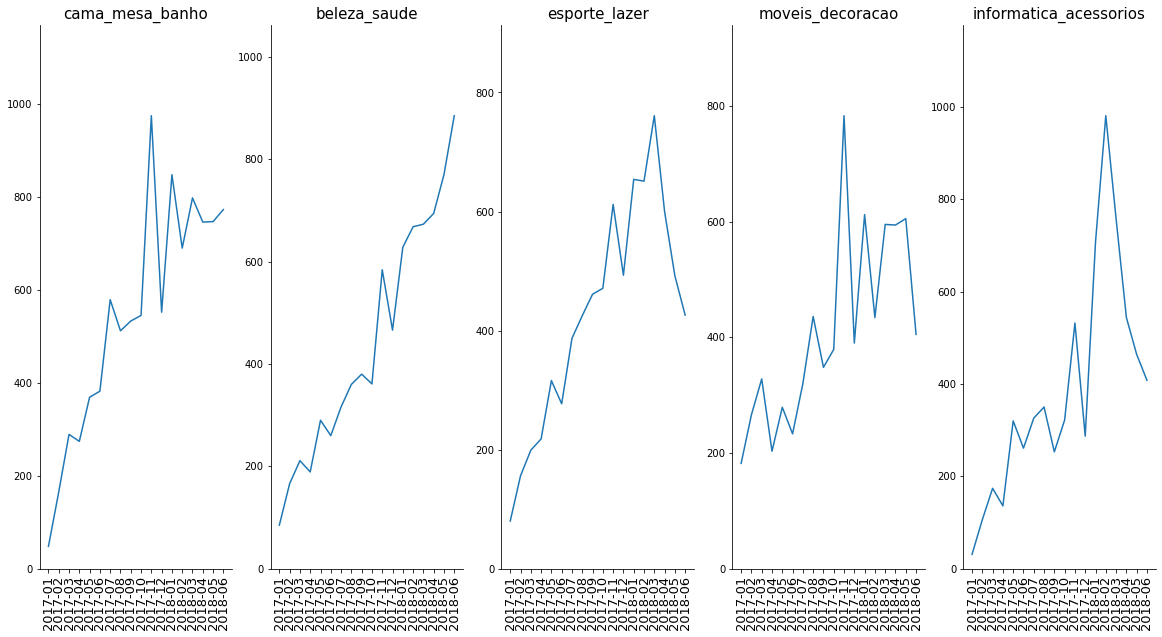

In [365]:
fig, axs = plt.subplots(figsize = (20,10), ncols=5)
i = 0
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
for product in top_5_category:
    df_temp = df_top_5_category[df_top_5_category['product_category_name'] == product]
    df_group = df_temp.groupby(df_temp['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values())['order_purchase_timestamp'].count().sort_index()
    plot_bar = sns.lineplot(x=df_group.index, y=df_group,ax=axs[i])
    plot_bar.set_title(product, size = 15)
    plot_bar.set(ylim=(0, max(df_group)*1.2))
    plot_bar.set_xticklabels(df_group.index, rotation=90, size = 13);
    plot_bar.set_ylabel('');
    plot_bar.set_xlabel('');
    i = 1 + i

Ao analisar as 5 categorias mais compradas da empresa, logo listamos:

Cama, Mesa e Banho | Beleza e Saúde | Esporte_Lazer | Móveis e Decoração | Informática e Acessórios

- **Cama, Mesa e Banho**, a categoria mais vendida, tiveram altos picos de vendas anteriores e está em tendecia de crescimento e também estabilização.

- **Beleza e Saúde**, a categoria mais promissóra, nos ultimos meses de 2018 essa categoria já ultrapassa valores de venda da Cama, Mesa e Banho e segue em ritmo de crescimento exponencial.

- **Esporte_Lazer**, a categoria com segundo maior declínio, estava em crescimento acentuado e nos ultimos meses de 2018 essa categoria cai bruscamente em numero de vendas.

- **Esporte_Lazer**, a categoria mais sazonal, possui um comportamento establizado em picos e vales entre os numeros de 800 à 500, com perpectiva de uma alta no mês Julho em 2018.

- **Informática e Acessórios**, a categoria com maior declínio, essa categoria teve o maior pico registrado em vendas durante o inicio de 2018 podendo ser uma sazonalidade ou novos produtos que bombaram de vendas e a demanda normalizou em seguida.

Para estimar novos valores de vendas para o mês de Julho, vamos recorrer para ferramentas de regressão e dentre elas o Modelo ARIMA.

O Modelo ARIMA utiliza de médias móveis para inferir novos valores em funções lineares e não lineares, vemos a ocorrencia do segundo tipo nos gráficos anterior de vendas por categoria.

Ideal é verificar P-values para verificar corelação nos dados de vendas em cada um das categorias estudadas.

In [139]:
for product in top_5_category: 
    df_temp = df_top_5_category[df_top_5_category['product_category_name'] == product]
    df_group = df_temp.groupby(df_temp['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values())['order_purchase_timestamp'].count()
    result = adfuller(df_group)
    print(product)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

cama_mesa_banho
ADF Statistic: -2.0851490973567692
p-value: 0.25052800111255963
Critical Values:
	1%: -3.9240193847656246
	5%: -3.0684982031250003
	10%: -2.67389265625
beleza_saude
ADF Statistic: 0.9412661746317512
p-value: 0.9936059077774961
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
esporte_lazer
ADF Statistic: -2.6526476655863176
p-value: 0.08259677216465883
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
moveis_decoracao
ADF Statistic: 0.7711372731491872
p-value: 0.9911556911632805
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487
informatica_acessorios
ADF Statistic: -1.4862518375040015
p-value: 0.5403010648960601
Critical Values:
	1%: -4.331573
	5%: -3.23295
	10%: -2.7487


O ideal é P-value maior que 0.55, neste caso temos as categorias Esportes_Lazer e Cama_Mesa_Banho que não atingiram um indice ideal para ARIMA

In [373]:
predicts = []
for product in top_5_category:
    df_category = df_top_5_category[df_top_5_category['product_category_name'] == product]
    arima_group = df_category.groupby(df_category['order_purchase_timestamp'].dt.strftime('%Y-%m-%d').sort_values())['order_purchase_timestamp'].count()
    
    arima_df = pd.DataFrame(arima_group)
    df_log = np.log(arima_df)
    df_log_shift.dropna(inplace=True)
    df_log.index = df_log.index.astype('datetime64[ns]').to_period('D')
    
    model = ARIMA(df_log, order=(2,1,2))
    results = model.fit(disp=-1)
    output = results.forecast(31)
    print('Previsão de número de vendas do produto {} no mês de Julho é de {}'.format(product,round(sum(np.exp(output[0])),0)))
    predicts.append(round(sum(np.exp(output[0])),0))


Previsão de número de vendas do produto cama_mesa_banho no mês de Julho é de 752.0
Previsão de número de vendas do produto beleza_saude no mês de Julho é de 909.0
Previsão de número de vendas do produto esporte_lazer no mês de Julho é de 462.0
Previsão de número de vendas do produto moveis_decoracao no mês de Julho é de 476.0
Previsão de número de vendas do produto informatica_acessorios no mês de Julho é de 398.0


inferimos novos valores para o mês de Julho em 2018

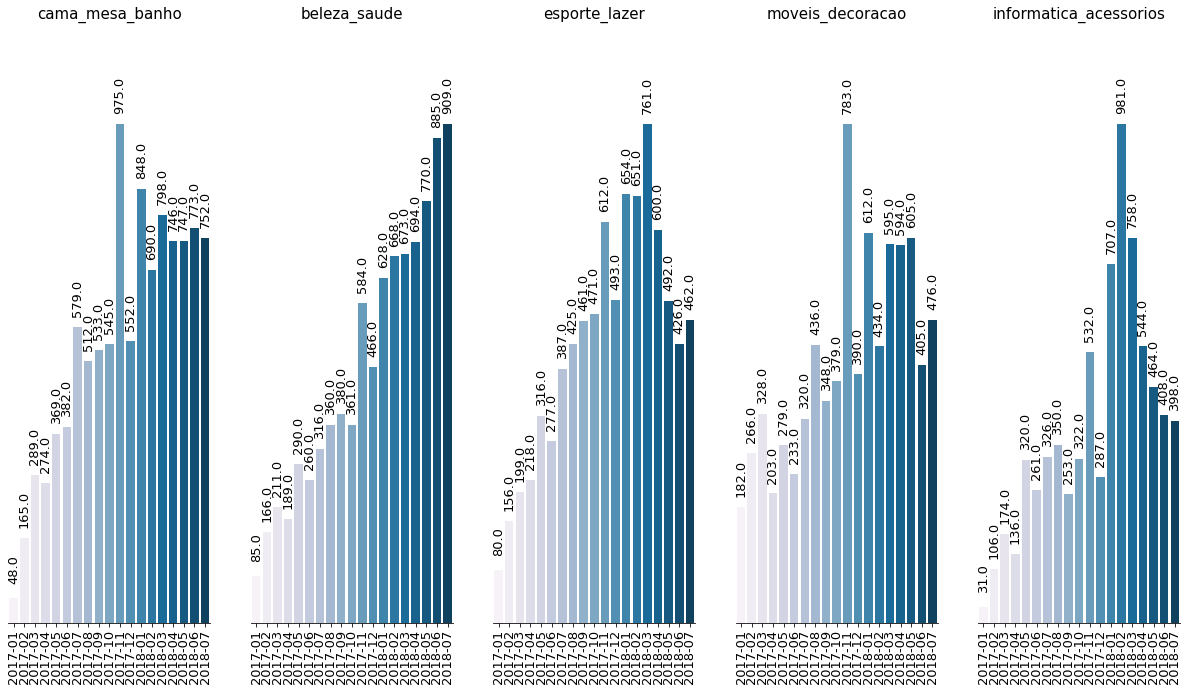

In [366]:
fig, axs = plt.subplots(figsize = (21,11), ncols=5)
i = 0
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
for product in top_5_category:
    df_temp = df_top_5_category[df_top_5_category['product_category_name'] == product]
    df_group = df_temp.groupby(df_temp['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values())['order_purchase_timestamp'].count().sort_index()
    df_group = pd.concat([df_group, pd.Series([predicts[i]], index=['2018-07'])])
    plot_bar = sns.barplot(x=df_group.index, y=df_group,ax=axs[i],palette="PuBu")
    plot_bar.set_title(product, size = 15)
    plot_bar.set(ylim=(0, max(df_group)*1.2))
    plot_bar.set_xticklabels(df_group.index, rotation=90, size = 13);
    plot_bar.set_ylabel('');
    plot_bar.set_xlabel('');
    for p in plot_bar.patches:
        plot_bar.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 29), 
                       textcoords = 'offset points',
                       rotation=90, size = 13)   
    plot_bar.set(yticklabels=[])
    plot_bar.tick_params(left=False)
    i = 1 + i

Verificamos aumentos em vendas nas categorias Beleza_Saúde, Esporte_Lazer e Moveis_Decorações. 

Redução de vendas nas categorias Cama_mesa_banho e Informatica Acessorios.

Relembrando que as as categoria Esportes_Lazer e Cama_Mesa_Banho pode possuir desvios em seus resultados.